<a href="https://colab.research.google.com/github/dzeke/ColoradoRiverCollaborate/blob/main/Powell10year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lake Powell Evaporation
## David E. Rosenberg
## February 13, 2024

## Overview
This is a Notebook (.ipynb). This document reads daily Reclamation data for Lake Powell Evaporation (https://www.usbr.gov/uc/water/hydrodata/reservoir_data/919/csv/25.csv). The code aggregates data to yearly (water year starting Oct 1). We then plot:

 + Evaporation by year over period of record
 + Total evaporation for each period of consecutative 10 years

## Requested Citation
David E. Rosenberg (2021), “Lake Powell Evaporation.” Utah State University. Logan, Utah.
https://github.com/dzeke/ColoradoRiverCollaborate/tree/main/Powell10year/AsPython.

### Pandas Cheat Sheet
Pandas cheat sheet at https://pandas.pydata.org/docs/user_guide/10min.html.

In [44]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Add this command on first run of cell
#!pip install plotnine
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

# Load the data from a csv file on Github
EvapDataAsUrl = 'https://raw.githubusercontent.com/dzeke/ColoradoRiverCollaborate/main/Powell10year/AsPython/25.csv'
# Load the data from Reclamation's webservice
EvapDataAsUrl = 'https://www.usbr.gov/uc/water/hydrodata/reservoir_data/919/csv/25.csv'
# Move the Dataset into a Pandas Dataframe
dfEvap = pd.read_csv(EvapDataAsUrl)
# Read the number of rows
nRows = len(dfEvap)

# Convert the datetime object column to pandas date time
dfEvap['date'] = pd.to_datetime(dfEvap['datetime'])

#Add year and month columns
dfEvap['year'] = pd.DatetimeIndex(dfEvap['date']).year
dfEvap['month'] = pd.DatetimeIndex(dfEvap['date']).month

#Calculate the water year, Increment by 1 year, Months 10, 11, 12
dfEvap['wateryear'] = dfEvap['year']
dfEvap.loc[dfEvap['month'] >= 10, 'wateryear'] = dfEvap['year'] + 1

#Calculate number of days/records for each water year
dfDaysPerWaterYear = pd.DataFrame(dfEvap.groupby('wateryear').size().reset_index())
# Rename the 0 column to DaysPerYear
dfDaysPerWaterYear.columns = ['wateryear', 'DaysPerYear']
#Filter to years with more than 360 days / records
dfFullYears = dfDaysPerWaterYear.query('DaysPerYear >= 360')

#Calculate total evaporation for each water year
dfEvapWaterYear = dfEvap.groupby('wateryear').sum().reset_index()

# Left join to only include Water Years with more than 360 days
dfEvapWaterYear = dfFullYears.merge(dfEvapWaterYear, on='wateryear', how='left')

# Turn acre-feet into million acre-feet
dfEvapWaterYear.evaporation = dfEvapWaterYear.evaporation / 1e6
# convert back to a dataframe
dfEvapWaterYear = pd.DataFrame(dfEvapWaterYear)

print()
print(dfEvapWaterYear.dtypes)
print(dfEvapWaterYear.head())

#dfEvapWaterYear['date'] = pd.to_datetime(dfEvapWaterYear['wateryear'])




wateryear        int64
DaysPerYear      int64
evaporation    float64
year             int64
month            int64
dtype: object
   wateryear  DaysPerYear  evaporation    year  month
0       1964          366     0.073775  718732   2384
1       1965          365     0.166053  717133   2382
2       1966          365     0.216575  717498   2382
3       1967          365     0.191975  717863   2382
4       1968          366     0.213552  720196   2384


# Figure 1. Annual Lake Powell Evaporation

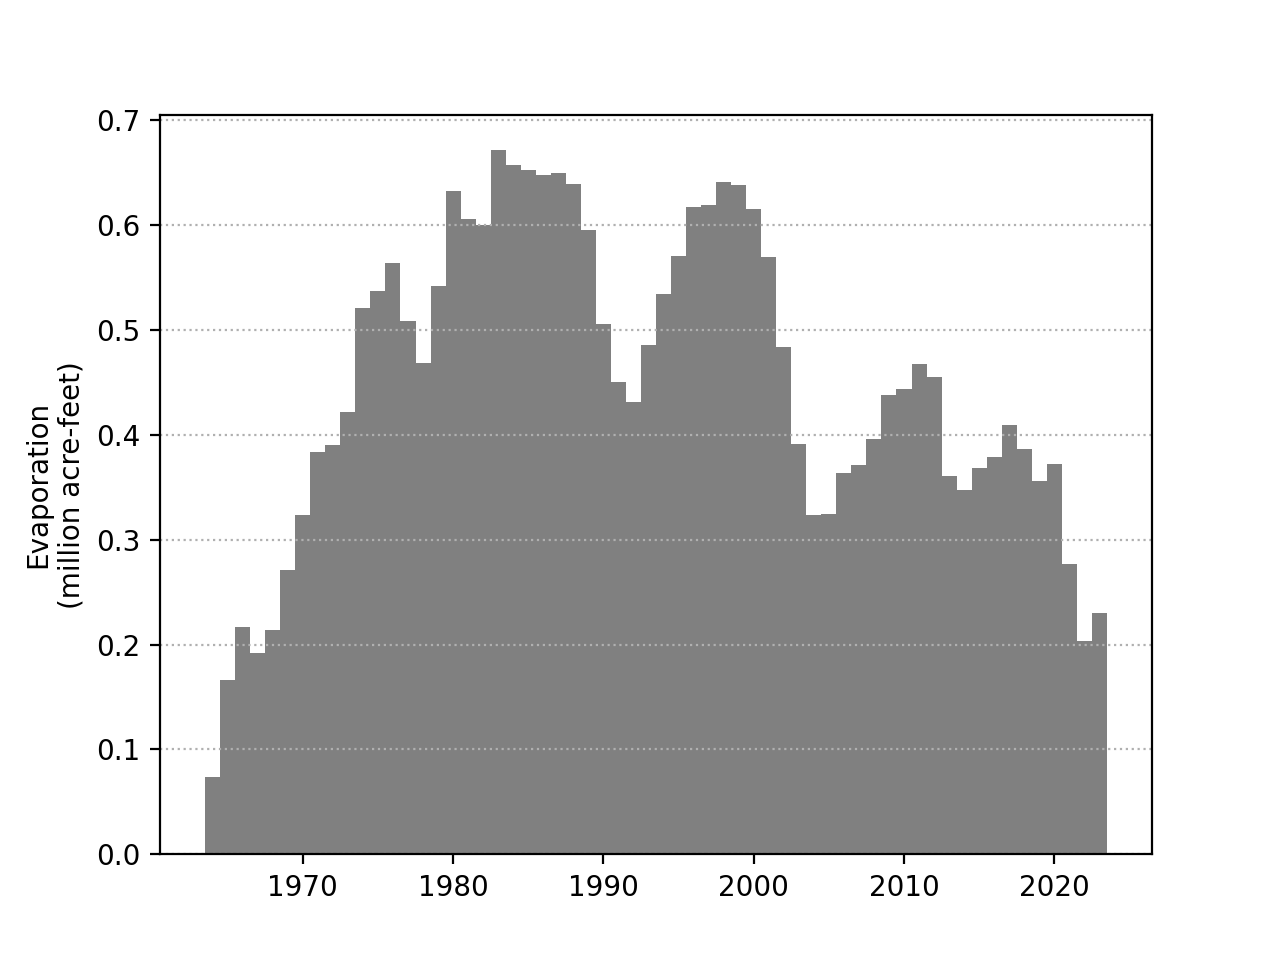

In [45]:
# Use matplotlib

import matplotlib.pyplot as plt

plt.bar(dfEvapWaterYear.wateryear, dfEvapWaterYear.evaporation, color = "grey", width = 1)
plt.xlabel('')
plt.ylabel('Evaporation\n(million acre-feet)')
plt.grid(axis = 'y', linestyle = "dotted")

#Use ggplot
###(ggplot(dfEvapWaterYear, aes(x = 'wateryear'))
### + geom_bar(aes(y='evaporation'), color = "grey", fill = "grey", stat="identity")
 # geom_line(aes(y=OneYearRelease, group = 1, color="Release"), size=2) +
#  + scale_color_manual("", values = "grey50")
#  + scale_fill_manual("", values = "grey50")
### + labs(x="", y="Evaporation\n(million acre-feet per year)")

 # + theme(text = element_text(size=20), legend.title=element_blank(), legend.text=element_text(size=18),
#        legend.key = element_blank())
###)


# Figure 2. Evaporation each consecutive 10-years

   wateryear  DaysPerYear  evaporation    year  month  Evap10yr
0       1964          366     0.073775  718732   2384       NaN
1       1965          365     0.166053  717133   2382       NaN
2       1966          365     0.216575  717498   2382       NaN
3       1967          365     0.191975  717863   2382       NaN
4       1968          366     0.213552  720196   2384       NaN


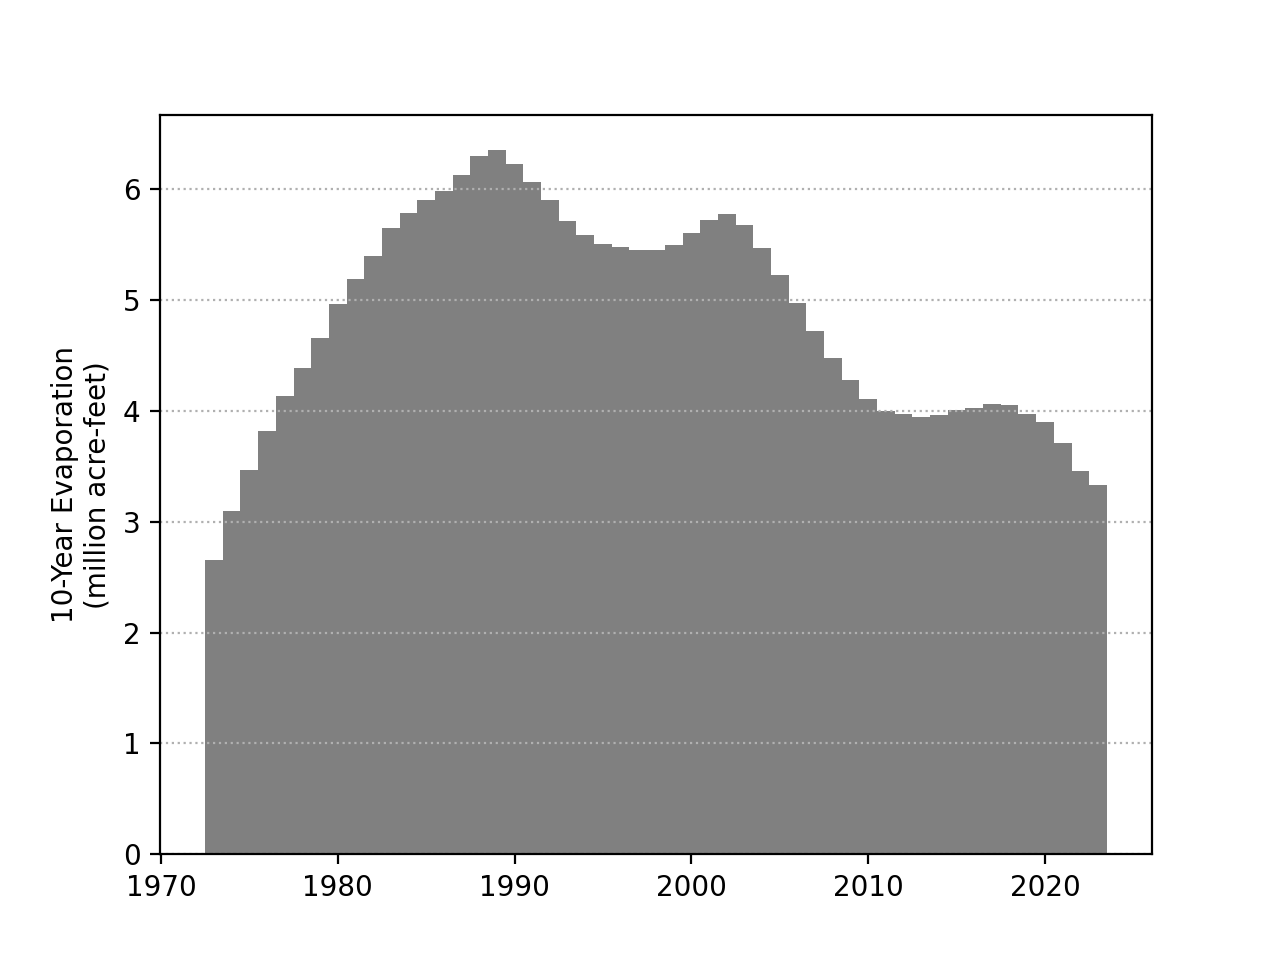

In [46]:
# Calculate a rolling 10-year sum
dfEvap10year = dfEvapWaterYear
dfEvap10year["Evap10yr"] = dfEvap10year['evaporation'].rolling(10).sum()

print(dfEvap10year.head())

plt.bar(dfEvap10year.wateryear, dfEvap10year.Evap10yr, color = "grey", width = 1)
plt.xlabel('')
plt.ylabel('10-Year Evaporation\n(million acre-feet)')
plt.grid(axis = 'y', linestyle = "dotted")